In [1]:
import os, re, sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mcmcHelperFunctions import *

pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

In [2]:
data = pd.read_csv("./singapore_covid_cases.csv")

In [3]:
local = data[data['Local case']==True]

In [4]:
# local
d_local = {'Feb 2': 0, 'Feb 3': 0, 'Feb 4': 6, 'Feb 5':4, 'Feb 6': 2, 'Feb 7': 4, 'Feb 8':7, 'Feb 9': 3, 'Feb 10': 2, \
    'Feb 11': 2, 'Feb 12': 2, 'Feb 13': 8, 'Feb 14': 9, 'Feb 15': 5, 'Feb 16': 3, 'Feb 17': 2, 'Feb 18': 4, 'Feb 19': 3, \
    'Feb 20': 1, 'Feb 21': 1, 'Feb 22': 3, 'Feb 23': 0, 'Feb 24': 1, 'Feb 25': 1, 'Feb 26': 2}

# first reported 
d = {'Jan 23':1,'Jan 24':2,'Jan 25':0,'Jan 26':1,'Jan 27':1,'Jan 28':2,'Jan 29':3,'Jan 30':3,'Jan 31':3,'Feb 1':2,\
    'Feb 2': 0, 'Feb 3': 0, 'Feb 4': 6, 'Feb 5':4, 'Feb 6': 2, 'Feb 7': 4, 'Feb 8':7, 'Feb 9': 3, 'Feb 10': 2, \
    'Feb 11': 2, 'Feb 12': 2, 'Feb 13': 8, 'Feb 14': 9, 'Feb 15': 5, 'Feb 16': 3, 'Feb 17': 2, 'Feb 18': 4, 'Feb 19': 3, \
    'Feb 20': 1, 'Feb 21': 1, 'Feb 22': 3, 'Feb 23': 0, 'Feb 24': 1, 'Feb 25': 1, 'Feb 26': 2}

# discharged
r = {'Feb 4':1,'Feb 7':1,'Feb 9':4,'Feb 10':1,'Feb 11':2,'Feb 12': 6,'Feb 14': 2, 'Feb 15':1,'Feb 16': 1, 'Feb 17': 5,\
     'Feb 18': 5, 'Feb 19': 5, 'Feb 20': 3, 'Feb 21': 10, 'Feb 22': 2, 'Feb 23': 2, 'Feb 24': 2, 'Feb 25':5, 'Feb 26':4}

In [5]:
inf = pd.DataFrame.from_dict(d,orient='index',columns=['count']).reset_index()
inf.columns = ['Date','New Infected']

inf_local = pd.DataFrame.from_dict(d_local ,orient='index',columns=['count']).reset_index()
inf_local.columns = ['Date','New Infected']

In [6]:
rec = pd.DataFrame.from_dict(r,orient='index',columns=['count']).reset_index()
rec.columns = ['Date','Recovered']

In [13]:
total = pd.merge(inf,rec,on='Date', how='left')
total_local = pd.merge(inf_local, rec, on='Date', how='left')

In [14]:
total['Recovered'].fillna(int(0), inplace=True)
total['Cumulative Infection'] = total['New Infected'].cumsum()
total['Cumulative Recovery'] = total['Recovered'].cumsum()

total_local['Recovered'].fillna(int(0), inplace=True)
total_local['Cumulative Infection'] = total_local['New Infected'].cumsum()
total_local['Cumulative Recovery'] = total_local['Recovered'].cumsum()

In [15]:
total.head()

,Date,New Infected,Recovered,Cumulative Infection,Cumulative Recovery
0,Jan 23,1,0.0,1,0.0
1,Jan 24,2,0.0,3,0.0
2,Jan 25,0,0.0,3,0.0
3,Jan 26,1,0.0,4,0.0
4,Jan 27,1,0.0,5,0.0


In [16]:
total_local.head()

,Date,New Infected,Recovered,Cumulative Infection,Cumulative Recovery
0,Feb 2,0,0.0,0,0.0
1,Feb 3,0,0.0,0,0.0
2,Feb 4,6,1.0,6,1.0
3,Feb 5,4,0.0,10,1.0
4,Feb 6,2,0.0,12,1.0


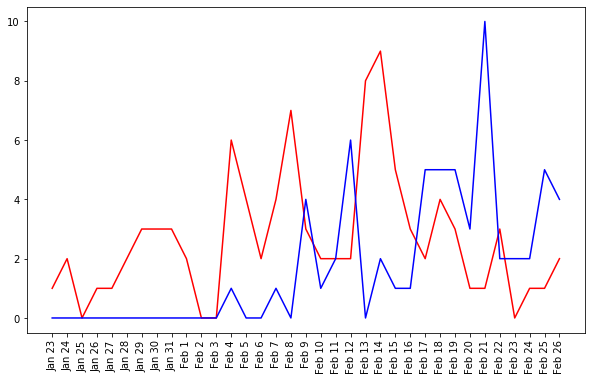

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
ax.plot(total['Date'], total['New Infected'], color='r')
ax.plot(total['Date'], total['Recovered'], color='b')
plt.show()

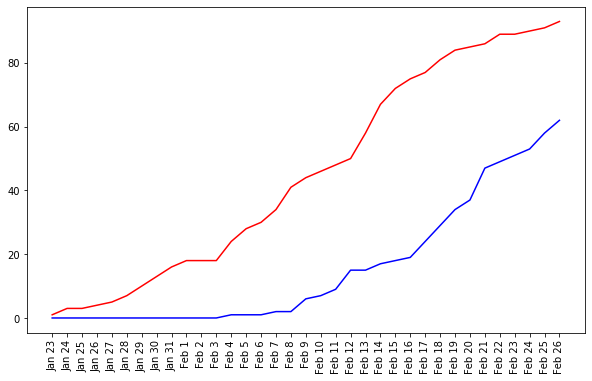

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=90)
ax.plot(total['Date'], total['Cumulative Infection'], color='r')
ax.plot(total['Date'], total['Cumulative Recovery'], color='b')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


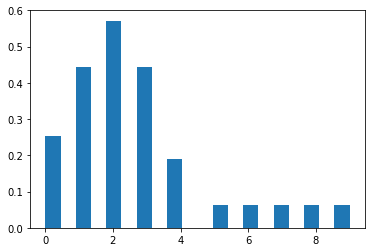

In [19]:
import seaborn as sb
plt.hist(total['New Infected'], bins = 20, normed = True)
plt.show()

In [78]:
mu = total['New Infected'].mean()
sigma = total['New Infected'].std()
mu, sigma

(2.657142857142857, 2.1820505351194615)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


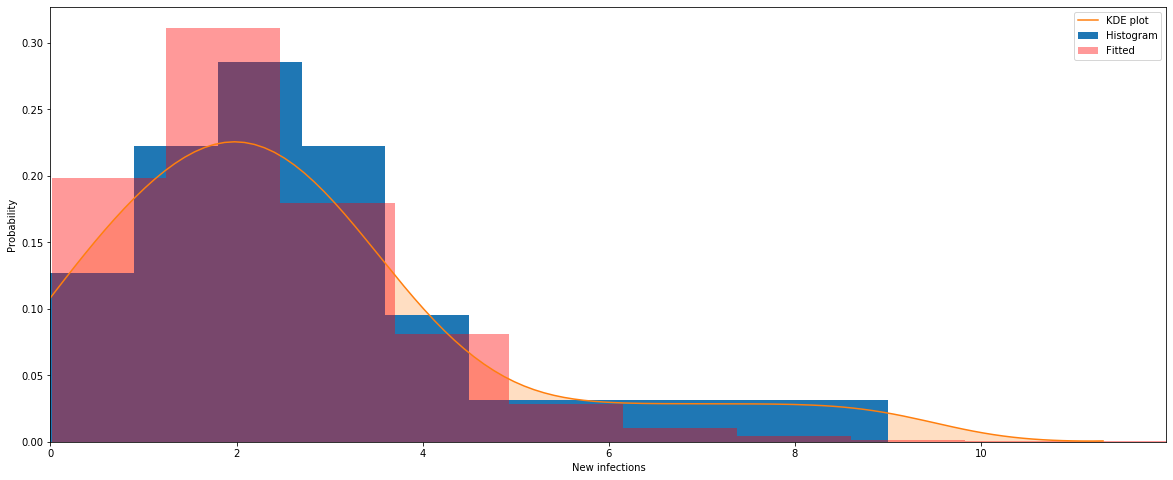

In [82]:
shape, scale = 2.6, 0.9 # manual
# shape = (mu/sigma)**2
# scale = sigma**2/mu

fig = plt.figure(figsize=(20,8))

gcount, gbins, ignored = plt.hist(total['New Infected'], bins=10, normed=True, label='Histogram')
sb.kdeplot(total['New Infected'], shade=True, label='KDE plot').set(xlim=(0))

g = np.random.gamma(shape, scale, 10000)
fcount, fbins, ignored = plt.hist(g, bins=10, normed=True, label='Fitted', alpha = 0.4, color='r')

plt.legend()
plt.ylabel("Probability")
plt.xlabel("New infections")
plt.show()

#### Kolmogorov-Smirnov test for goodness of fit

In [83]:
from scipy.stats import kstest
kstest(total['New Infected'], 'gamma', args=[shape,scale])

KstestResult(statistic=0.41128345420583934, pvalue=7.187308461361265e-06)

iter: 1000.0
Theta: 1
Mean of samples: 2.6466643161011345, Stddev of samples: 1.6376585404240653
Theta: 6
Mean of samples: 2.5490092255547343, Stddev of samples: 1.5488723259191521
Theta: 11
Mean of samples: 2.593824620349659, Stddev of samples: 1.6760241319892328
Theta: 16
Mean of samples: 2.5672124006416244, Stddev of samples: 1.5965124313554437
Theta: 21
Mean of samples: 2.766017799216109, Stddev of samples: 2.027152592051119
Gelman Rubin convergence ratio: 1.1835163203503054
iter: 5500.0
Theta: 1
Mean of samples: 2.64165267394839, Stddev of samples: 1.6613752188895101
Theta: 6
Mean of samples: 2.6125060920285224, Stddev of samples: 1.6253015920224614
Theta: 11
Mean of samples: 2.580863513384631, Stddev of samples: 1.588466371127055
Theta: 16
Mean of samples: 2.569322746347804, Stddev of samples: 1.6211095971710643
Theta: 21
Mean of samples: 2.64991708366565, Stddev of samples: 1.6465298892435936
Gelman Rubin convergence ratio: 1.1834121548307024
iter: 10000.0
Theta: 1
Mean of sampl

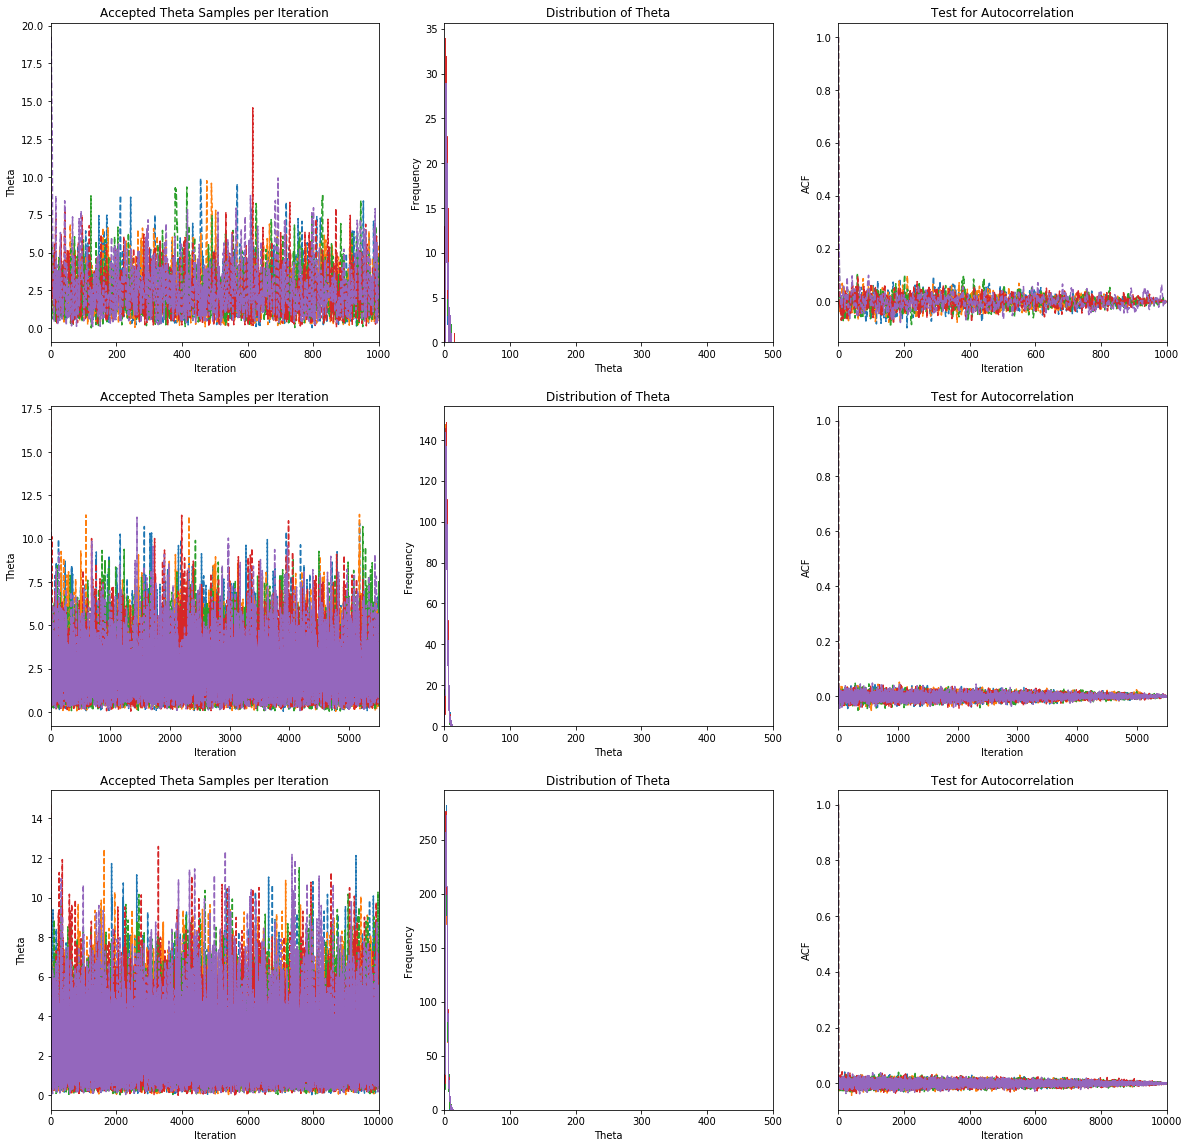

Wall time: 1min 45s


In [75]:
%%time
mcmc_samples = MCMC(shape, scale, sigma = 5, niters = np.linspace(1e3,1e4,3), thetas = np.arange(1, 25, 5))

#### Result of MCMC Samples

In [34]:
a_i = b_i = 0
ab = [numericalMLEGamma(s) for s in mcmc_samples]
for x in ab:
    a_i += x[0]
    b_i += x[1]
print('Alpha: %s, Beta: %s' %(round(a_i/len(ab),1), round(b_i/len(ab),1)))
print('Mean infection count: %s' %(round(a_i/len(ab)*b_i/len(ab),1)))
print('Stddev infection count: %s' %(round(np.sqrt(a_i/len(ab)*b_i/len(ab)*b_i/len(ab)),1)))

Alpha: 2.3, Beta: 1.3
Mean infection count: 3.1
Stddev infection count: 2.0


iter: 5000
Theta: 1
Mean of samples: 1.649422189116411, Stddev of samples: 1.1351417731807392
Theta: 6
Mean of samples: 1.6648587156543428, Stddev of samples: 1.1356580890545762
Theta: 11
Mean of samples: 1.6631053496886095, Stddev of samples: 1.1363197581092686
Theta: 16
Mean of samples: 1.6458910182086135, Stddev of samples: 1.1424212911912184
Theta: 21
Mean of samples: 1.70677172439067, Stddev of samples: 1.2107994079312137
Gelman Rubin convergence ratio: 1.1833936724661576


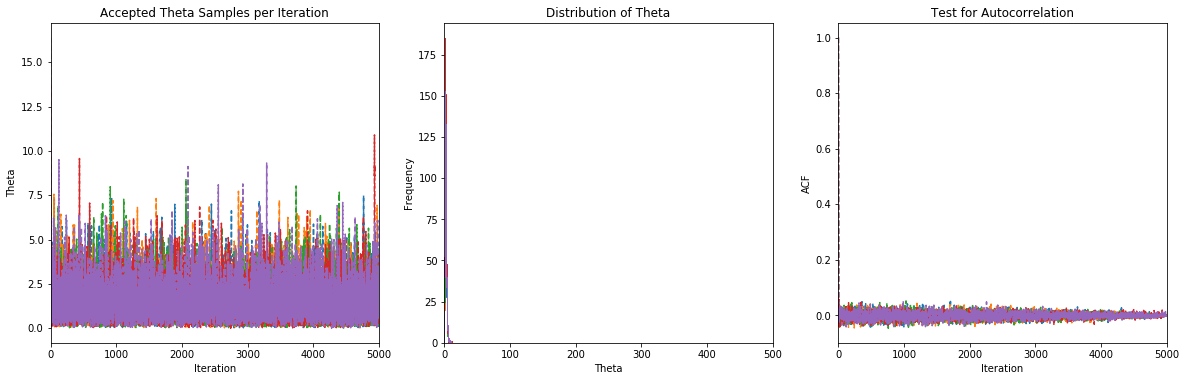

Alpha: 1.9, Beta: 0.9
Mean infection count: 1.7
Stddev infection count: 1.6
iter: 5000
Theta: 1
Mean of samples: 3.1480590286586048, Stddev of samples: 2.4948476210354054
Theta: 6
Mean of samples: 3.099004712896068, Stddev of samples: 2.377803779149295
Theta: 11
Mean of samples: 3.2363015627449134, Stddev of samples: 2.518497544696921
Theta: 16
Mean of samples: 3.1378810241511528, Stddev of samples: 2.3788848227249426
Theta: 21
Mean of samples: 3.221650204495066, Stddev of samples: 2.537042990130298
Gelman Rubin convergence ratio: 1.1833168967723935


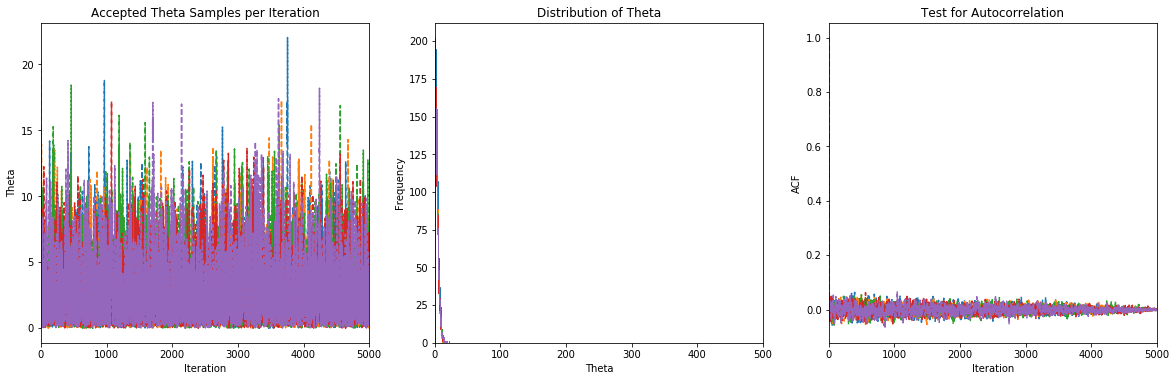

Alpha: 1.5, Beta: 2.2
Mean infection count: 3.2
Stddev infection count: 0.5
iter: 5000
Theta: 1
Mean of samples: 3.45607871114562, Stddev of samples: 2.056995489845145
Theta: 6
Mean of samples: 3.5417591159063218, Stddev of samples: 2.1071285718767006
Theta: 11
Mean of samples: 3.4089949917938966, Stddev of samples: 2.011017912968604
Theta: 16
Mean of samples: 3.515527407384709, Stddev of samples: 2.1199767424250715
Theta: 21
Mean of samples: 3.4447320429678054, Stddev of samples: 2.062186956370369
Gelman Rubin convergence ratio: 1.1836758923666326


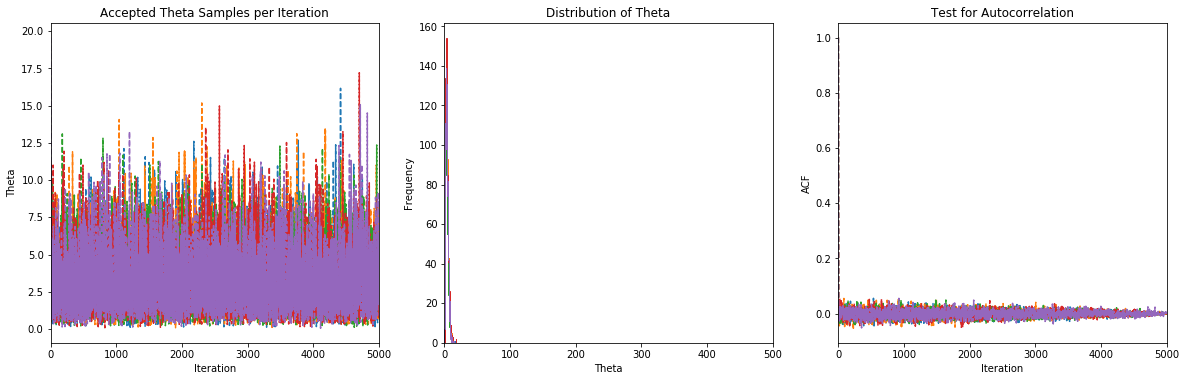

Alpha: 2.6, Beta: 1.3
Mean infection count: 3.4
Stddev infection count: 1.2
iter: 5000
Theta: 1
Mean of samples: 5.079041017849629, Stddev of samples: 2.7227177578465844
Theta: 6
Mean of samples: 5.176976490024884, Stddev of samples: 2.8881216269248986
Theta: 11
Mean of samples: 5.261120440437102, Stddev of samples: 2.8746245423830628
Theta: 16
Mean of samples: 5.211513440884873, Stddev of samples: 2.877463471163051
Theta: 21
Mean of samples: 5.256428902815735, Stddev of samples: 2.8830011768281687
Gelman Rubin convergence ratio: 1.1835035544804686


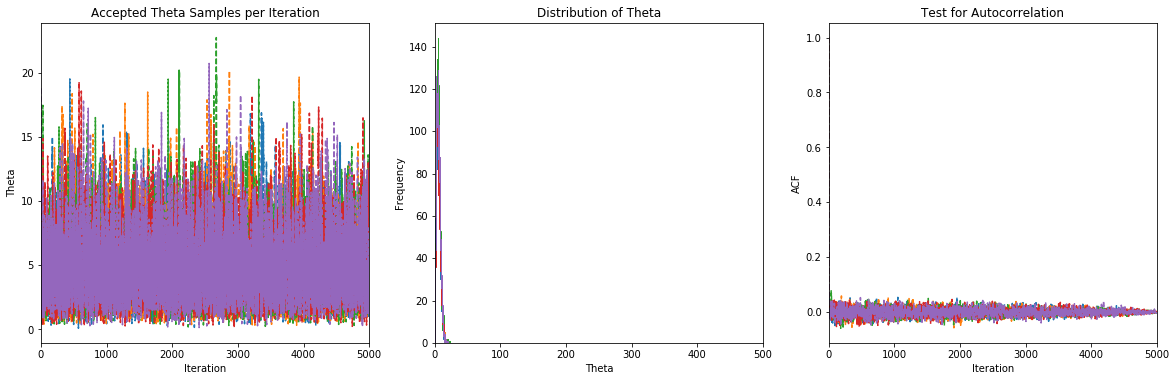

Alpha: 3.1, Beta: 1.7
Mean infection count: 5.3
Stddev infection count: 1.1
iter: 5000
Theta: 1
Mean of samples: 1.5510396564105147, Stddev of samples: 1.1281882412147426
Theta: 6
Mean of samples: 1.557858301594363, Stddev of samples: 1.1614823647817876
Theta: 11
Mean of samples: 1.5355104286476515, Stddev of samples: 1.1535940694120275
Theta: 16
Mean of samples: 1.5932372460403648, Stddev of samples: 1.1825401908183497
Theta: 21
Mean of samples: 1.5861059539374547, Stddev of samples: 1.1924907933902797
Gelman Rubin convergence ratio: 1.1832603409247386


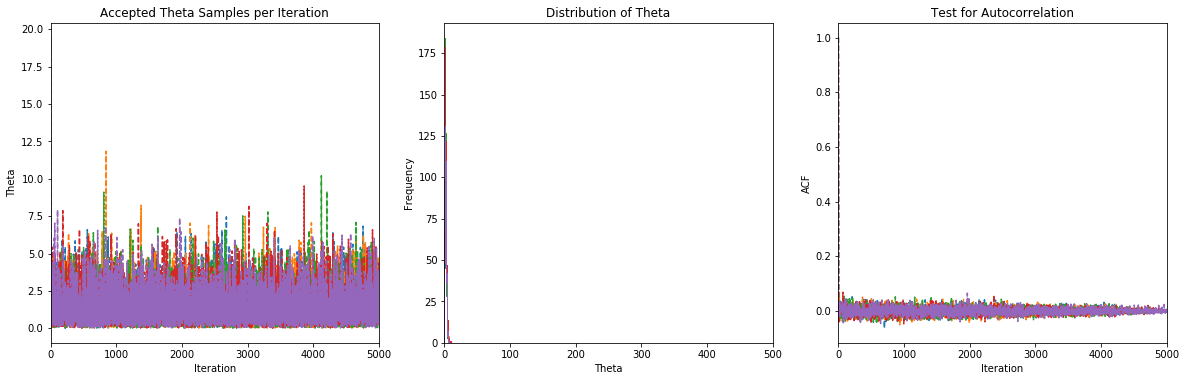

Alpha: 1.7, Beta: 0.9
Mean infection count: 1.6
Stddev infection count: 1.4
Wall time: 3min 3s


In [71]:
%%time
ab_list = []
for i in range(total.shape[0]):
    if i % 7 == 0:
        mu = total['New Infected'].iloc[0+i:7+i].mean()
        sigma = total['New Infected'].iloc[0+i:7+i].std()
        shape = (mu/sigma)**2
        scale = sigma**2/mu
        mcmc_samples = MCMC(shape, scale, sigma = 5, niters = [5000], thetas = np.arange(1, 25, 5))
        

        ab = [numericalMLEGamma(s) for s in mcmc_samples] # numericalMLEGamma returns a tuple of (alpha,beta)

        alpha,beta = ab[-1]
        ab_list.append(ab[-1])

        print('Alpha: %s, Beta: %s' %(round(alpha,1), round(beta,1)))
        print('Mean infection count: %s' %(round(alpha*beta,1)))
        print('Stddev infection count: %s' %(round(np.sqrt(alpha/(beta**2)),1)))

In [85]:
[a*b for a,b in ab_list]

[1.70677172439067,
 3.2216502044950657,
 3.4447320429678054,
 5.256428902815735,
 1.5861059539374547]

## Find mean Infection rate using local data

## Recovered counts

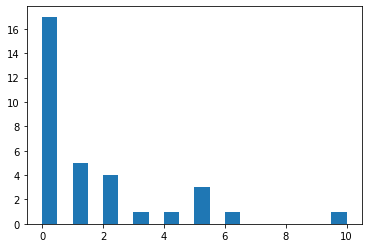

In [23]:
plt.hist(total['Recovered'], bins = 20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


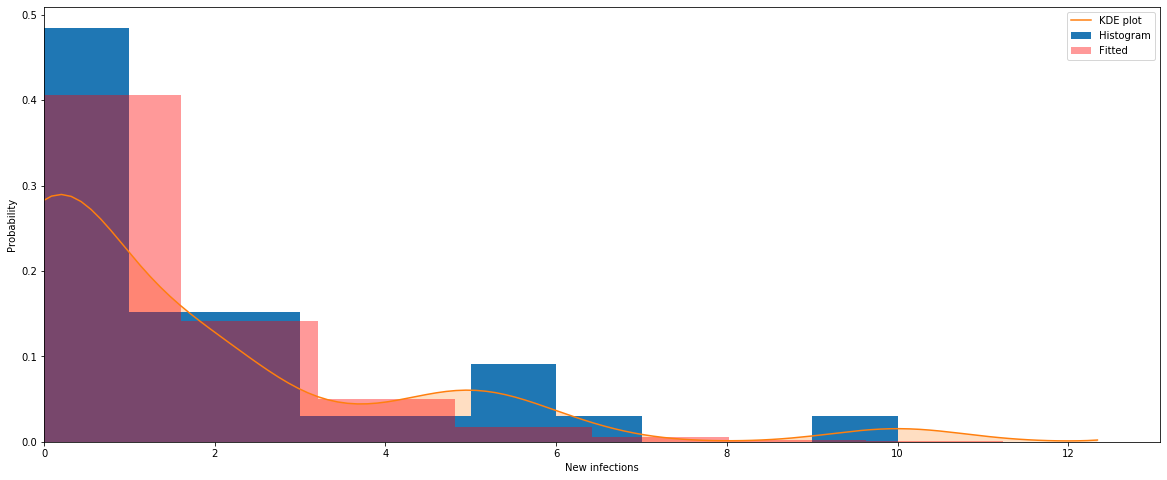

In [20]:
shape, scale = 1, 1.5 # manual
fig = plt.figure(figsize=(20,8))

gcount, gbins, ignored = plt.hist(total['Recovered'], bins=10, normed=True, label='Histogram')
sb.kdeplot(total['Recovered'], shade=True, label='KDE plot').set(xlim=(0))

g = np.random.gamma(shape, scale, 10000)
fcount, fbins, ignored = plt.hist(g, bins=10, normed=True, label='Fitted', alpha = 0.4, color='r')

plt.legend()
plt.ylabel("Probability")
plt.xlabel("New infections")
plt.show()

In [21]:
from scipy.stats import kstest
kstest(total['Recovered'], 'gamma', args=[shape,scale])

KstestResult(statistic=0.6363636363636364, pvalue=1.6665524623496284e-13)

## SEIR model
- to overlay

In [189]:
incubation_duration = 8
infectious_duration = 14

beta = 0.3
sigma = 1/incubation_duration # incubation rate
gamma = 1/infectious_duration # recovery rate

In [202]:
N = 500000   # Total population as an arbituary number, putting it as the size of Singapore's population
I0, R0 = 1, 0 # Initial number of Infected (base on first case of Wuhan infection) and Recovered cases
E0 = 5 # initial number of Exposed cases
S0 = N - E0 - I0 - R0 # initial susceptible population

In [203]:
## to simulate over the next n days
n_days = 360
t = np.linspace(0, n_days, n_days)

In [204]:
def deriv(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E 
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [205]:
from scipy.integrate import odeint

# Initial conditions vector
y0 = S0, E0, I0, R0
# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma))
S, E, I, R = ret.T

In [206]:
from datetime import datetime

date_start = datetime.strptime('2020-01-23', '%Y-%m-%d')
datelist = pd.date_range(date_start,periods=n_days).to_list()
dates = [str(d.date()) for d in datelist]

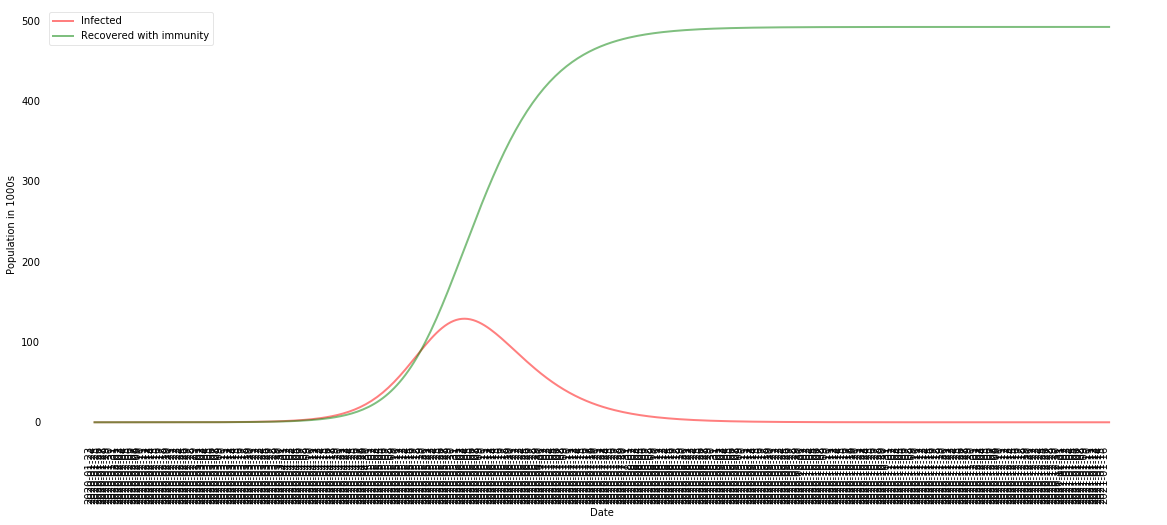

In [212]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
# ax.plot(dates, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(dates, E/1000, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(dates, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(dates, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')

ax.set_xticklabels(dates, rotation = 90, ha="right")
ax.set_xticks(range(n_days),5)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('Date')
ax.set_ylabel(f'Population in {1000}s')
# ax.set_ylim(0,N+0.2*N)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [208]:
dates[I.argmax()]

'2020-06-02'

In [209]:
total['Infected_Simulated'] = np.round(I[:len(d)])
total['Recovered_Simulated'] = np.round(R[:len(d)])

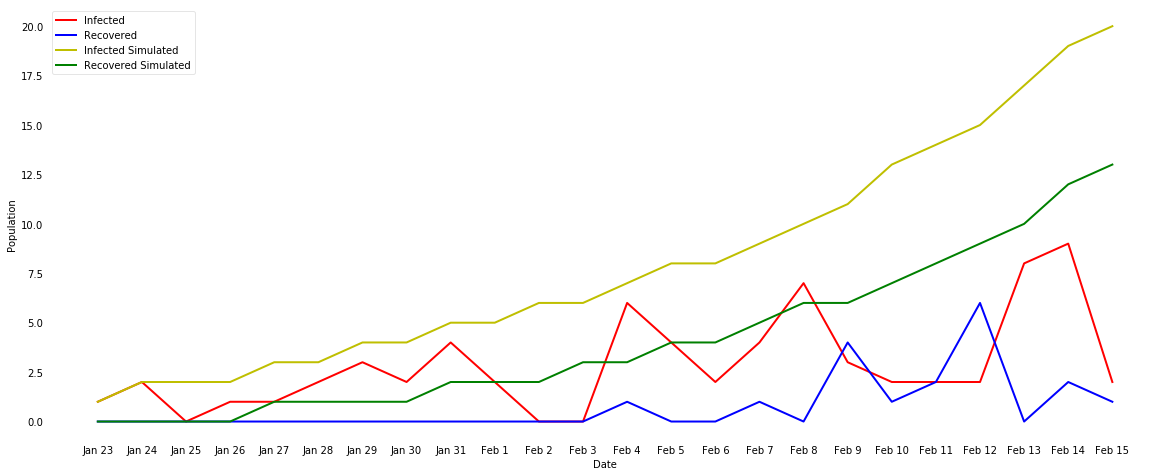

In [210]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
ax.plot(total['Date'], total['Infected'], lw=2, label='Infected', color='r')
ax.plot(total['Date'], total['Recovered'], lw=2, label='Recovered', color='b')
ax.plot(total['Date'], total['Infected_Simulated'], lw=2, label='Infected Simulated', color='y')
ax.plot(total['Date'], total['Recovered_Simulated'], lw=2, label='Recovered Simulated', color='g')

# ax.plot(dates, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')

ax.set_xticks(range(len(d)),2)
# ax.set_xticklabels(dates, rotation = 30, ha="right")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('Date')
ax.set_ylabel(f'Population')
# ax.set_ylim(0,N+0.2*N)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()